In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка датасета


In [2]:
# Чтение датасета
education = pd.read_csv('/content/drive/MyDrive/Проект_Образование/data.csv', sep=';')

In [3]:
# В датасете много колонок. Отобразим их все на экране.
pd.set_option('display.max_columns', 30)

In [4]:
education.head()

federal_district federal_district_short  region_code  \
0  Южный федеральный округ                    ЮФО            1   
1  Южный федеральный округ                    ЮФО            1   
2  Южный федеральный округ                    ЮФО            1   
3  Южный федеральный округ                    ЮФО            1   
4  Южный федеральный округ                    ЮФО            1   

                  region_name        okato  id  \
0  Республика Адыгея (Адыгея)  79000000000   1   
1  Республика Адыгея (Адыгея)  79000000000   1   
2  Республика Адыгея (Адыгея)  79000000000   1   
3  Республика Адыгея (Адыгея)  79000000000   1   
4  Республика Адыгея (Адыгея)  79000000000   1   

                                                name      name_short  year  \
0  Федеральное государственное бюджетное образова...  ФГБОУ ВО «АГУ»  2013   
1  Федеральное государственное бюджетное образова...  ФГБОУ ВО «АГУ»  2014   
2  Федеральное государственное бюджетное образова...  ФГБОУ ВО «АГУ»  2015   
3  Федеральное государственное бюджетное образова...  ФГБОУ ВО «АГУ»  2016   
4  Федеральное государственное бюджетное образова...  ФГБОУ ВО «АГУ»  2017   

      e1      e2     e3       e4      e5      e6    e8  ege_budg     wos  \
0  61.88   75.55   6.63  2556.79   14.22  94.464  6.91     63.03   8.148   
1  55.81   76.32   9.17  2765.05  142.78  55.000  7.33     57.60  15.721   
2  57.45   86.40  12.43  2881.25  166.81  55.000  7.10     58.58  20.482   
3  59.44   84.80  15.85  1976.00  146.02   0.000  6.75     60.76   4.849   
4  60.15  109.27  24.50  2044.22  158.43  65.000  5.75     61.82   3.993   

    scopus       rsci      rnd  total_income  square  phd_share  pps  \
0   1.8060   346.5420  34979.8   1183805.084   53753      86.11  420   
1  29.7306   591.9454  34739.6   1258764.500   53753      88.74  398   
2  55.8250  1323.0140  35750.5   1192261.000   51206      88.72  385   
3  22.3054  1456.9007  32631.6    760364.600   60484      90.93  373   
4  17.0247  1014.9843  39626.1    741335.000   60471      90.36  363   

   rnd_private       pk  
0     12016.20  3781.40  
1     11741.00  3749.05  
2     19762.05  3459.40  
3     21984.62  3514.65  
4     27054.39  4179.00

In [5]:
# В датасете 27 признаков и 2564 наблюдения
education.shape

(2564, 27)

In [6]:
# Посмотрим на типы данных
education.dtypes

federal_district           object
federal_district_short     object
region_code                 int64
region_name                object
okato                       int64
id                          int64
name                       object
name_short                 object
year                        int64
e1                        float64
e2                        float64
e3                        float64
e4                        float64
e5                        float64
e6                        float64
e8                        float64
ege_budg                  float64
wos                       float64
scopus                    float64
rsci                      float64
rnd                       float64
total_income              float64
square                      int64
phd_share                 float64
pps                         int64
rnd_private               float64
pk                        float64
dtype: object

In [7]:
# Посмотрим на общую информацию о датасете. В столбце е6 есть пропущенные значения. Остальные столбцы заполнены.
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   federal_district        2564 non-null   object 
 1   federal_district_short  2564 non-null   object 
 2   region_code             2564 non-null   int64  
 3   region_name             2564 non-null   object 
 4   okato                   2564 non-null   int64  
 5   id                      2564 non-null   int64  
 6   name                    2564 non-null   object 
 7   name_short              2564 non-null   object 
 8   year                    2564 non-null   int64  
 9   e1                      2564 non-null   float64
 10  e2                      2564 non-null   float64
 11  e3                      2564 non-null   float64
 12  e4                      2564 non-null   float64
 13  e5                      2564 non-null   float64
 14  e6                      2497 non-null   

In [8]:
# В столбце е6 67 пропущенных значений
education['e6'].isna().sum()

67

In [9]:
# Удалим пропуски.
education = education.dropna()

In [10]:
# Убедимся, что пропуски удалены
education.shape

(2497, 27)

In [11]:
# Загрузим датасет с расшифровкой названий колонок.
structure = pd.read_csv('/content/drive/MyDrive/Проект_Образование/structure.csv', sep=';')

In [12]:
structure

field name\tenglish description\trussian description\tmeasure\tokei_code\tformat
0   federal_district\tFederal'nyj okrug\tФедеральн...                              
1   federal_district_short\tSokrashchennoe naimeno...                              
2   region_code\t"Kod sub""ekta RF"\tКод субъекта ...                              
3   region_name\t"Sub""ekt RF"\tСубъект РФ\t\t\tst...                              
4                     okato\tOKATO\tОКАТО\t\t\tstring                              
5   id\tIdentifikacionnyj nomer obrazovatel'noj or...                              
6   name\tPolnoe naimenovanie obrazovatel'noj orga...                              
7   name_short\tKorotkoe naimenovanie obrazovatel'...                              
8                             year\tGod\tГод\t\t\tint                              
9   e1\tOtnoshenie summy srednih ballov EGE studen...                              
10  e2\t"Otnoshenie obshchego ob""ema sredstv, pos...                              
11  e3\tOtnoshenie privedennogo kontingenta studen...                              
12  e4\t"Otnoshenie ob""ema sredstv organizacii, p...                              
13  e5\t"Otnoshenie fonda nachislennoj zarabotnoj ...                              
14  e6\tOtnoshenie chislennosti trudoustroivshihsy...                              
15  e8\tOtnoshenie privedennoj k chislu stavok chi...                              
16  ege_budg\tSrednij ball EGE studentov, prinyaty...                              
17  wos\tCHislo publikacij organizacii, indeksirue...                              
18  scopus\tCHislo publikacij organizacii, indeksi...                              
19  rsci\tCHislo publikacij organizacii, indeksiru...                              
20  rnd\t"Obshchij ob""em nauchno-issledovatel'ski...                              
21  total_income\tDohody vuza iz vsekh istochnikov...                              
22  square\tObshchaya ploshchad' uchebno-laborator...                              
23  phd_share\t"Udel'nyj ves chislennosti obuchayu...                              
24  pps\tObshchaya chislennost' PPS (bez vneshnih ...                              
25  rnd_private\tDohody ot NIOKR (za isklyucheniem...                              
26  pk\tObshchaya chislennost' studentov (priveden...

In [13]:
# Вся информация оказалась в одной колонке. Создадим отдельную колонку для каждого признака.
structure = structure['field name\tenglish description\trussian description\tmeasure\tokei_code\tformat'].str.split('\t', expand=True)

In [14]:
structure

0                                                  1  \
0         federal_district                                  Federal'nyj okrug   
1   federal_district_short    Sokrashchennoe naimenovanie Federal'nogo okruga   
2              region_code                                 "Kod sub""ekta RF"   
3              region_name                                      "Sub""ekt RF"   
4                    okato                                              OKATO   
5                       id  Identifikacionnyj nomer obrazovatel'noj organi...   
6                     name    Polnoe naimenovanie obrazovatel'noj organizacii   
7               name_short  Korotkoe naimenovanie obrazovatel'noj organizacii   
8                     year                                                God   
9                       e1  Otnoshenie summy srednih ballov EGE studentov,...   
10                      e2  "Otnoshenie obshchego ob""ema sredstv, postupi...   
11                      e3  Otnoshenie privedennogo kontingenta studentov ...   
12                      e4  "Otnoshenie ob""ema sredstv organizacii, postu...   
13                      e5  "Otnoshenie fonda nachislennoj zarabotnoj plat...   
14                      e6  Otnoshenie chislennosti trudoustroivshihsya v ...   
15                      e8  Otnoshenie privedennoj k chislu stavok chislen...   
16                ege_budg  Srednij ball EGE studentov, prinyatyh po rezul...   
17                     wos  CHislo publikacij organizacii, indeksiruemyh v...   
18                  scopus  CHislo publikacij organizacii, indeksiruemyh v...   
19                    rsci  CHislo publikacij organizacii, indeksiruemyh v...   
20                     rnd  "Obshchij ob""em nauchno-issledovatel'skih i o...   
21            total_income                   Dohody vuza iz vsekh istochnikov   
22                  square  Obshchaya ploshchad' uchebno-laboratornyh pome...   
23               phd_share  "Udel'nyj ves chislennosti obuchayushchihsya (...   
24                     pps  Obshchaya chislennost' PPS (bez vneshnih sovme...   
25             rnd_private  Dohody ot NIOKR (za isklyucheniem sredstv byud...   
26                      pk  Obshchaya chislennost' studentov (privedennyj ...   

                                                    2                3 4  \
0                                   Федеральный округ                      
1        Сокращенное наименование Федерального округа                      
2                                     Код субъекта РФ                      
3                                          Субъект РФ                      
4                                               ОКАТО                      
5   Идентификационный номер образовательной органи...                      
6     Полное наименование образовательной организации                      
7   Короткое наименование образовательной организации                      
8                                                 Год                      
9   Отношение суммы средних баллов ЕГЭ студентов, ...                      
10  Отношение общего объема средств, поступивших з...                      
11  Отношение приведенного контингента студентов –...          процент     
12  Отношение объема средств организации, поступив...                      
13  Отношение фонда начисленной заработной платы р...          процент     
14  Отношение численности трудоустроившихся в тече...          процент     
15  Отношение приведенной к числу ставок численнос...                      
16  Средний балл ЕГЭ студентов, принятых по резуль...             балл     
17  Число публикаций организации, индексируемых в ...          единица     
18  Число публикаций организации, индексируемых в ...          единица     
19  Число публикаций организации, индексируемых в ...          единица     
20  Общий объем научно-исследовательских и опытно-...    тысяча рублей     
21                     Доходы вуза из всех источников    тысяча рублей     
22      

In [15]:
# Удалим ненужные столбцы.
structure = structure.drop(columns=[1,4,5], axis=0)

In [16]:
# Содержание столбца с расшифровкой названий не умещается в таблице. Сделаем ширину максимально возможной.
pd.options.display.max_colwidth = None

In [17]:
# Переименуем столбцы.
structure.rename(columns={0: 'column_name', 2: 'translation_to_russian', 3: 'units'}, inplace=True)

In [18]:
structure

column_name  \
0         federal_district   
1   federal_district_short   
2              region_code   
3              region_name   
4                    okato   
5                       id   
6                     name   
7               name_short   
8                     year   
9                       e1   
10                      e2   
11                      e3   
12                      e4   
13                      e5   
14                      e6   
15                      e8   
16                ege_budg   
17                     wos   
18                  scopus   
19                    rsci   
20                     rnd   
21            total_income   
22                  square   
23               phd_share   
24                     pps   
25             rnd_private   
26                      pk   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             translation_to_russian  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Федеральный округ   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Сокращенное наименование Федерального округа   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Код субъекта РФ   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [19]:
# Удалим из датасета education признаки, не представляющие интереса для исследования или дублирующие друг друга (например, 'код субъекта РФ' и 'субъект РФ')
education = education.drop(columns=['federal_district_short',	'region_code', 	'okato'], axis=0)

In [20]:
# Заменим в названиях федеральных округов в столбце federal_district словосочетание "федеральный округ" на "фо" для компактности отображения на графиках
# Сначала сделаем замену в одной строке датасета
import re
re.sub(r'федеральный округ', r'ФО', education['federal_district'][0])

'Южный ФО'

In [21]:
# Напишем функцию
def change_substring(federal_district):
    short_name = re.sub(r'федеральный округ', r'ФО', federal_district)
    return short_name

In [22]:
# Применим метод ко всему датасету
education['federal_district'] = education['federal_district'].apply(change_substring)

In [23]:
# Переведем данные в столбце total_income из тыс.руб. в млрд руб.
education['total_income'] = education['total_income'] / 1_000_000

In [24]:
# Переведем данные в столбце rnd и rnd_private из тыс.руб. в млн руб.
education['rnd'] = education['rnd'] / 1_000
education['rnd_private'] = education['rnd_private'] / 1_000

In [25]:
education

federal_district                 region_name      id  \
0            Южный ФО  Республика Адыгея (Адыгея)       1   
1            Южный ФО  Республика Адыгея (Адыгея)       1   
2            Южный ФО  Республика Адыгея (Адыгея)       1   
3            Южный ФО  Республика Адыгея (Адыгея)       1   
4            Южный ФО  Республика Адыгея (Адыгея)       1   
...               ...                         ...     ...   
2557         Южный ФО             Республика Крым  113416   
2560         Южный ФО              г. Севастополь  113437   
2561         Южный ФО              г. Севастополь  113437   
2562   Центральный ФО                   г. Москва  120111   
2563   Центральный ФО                   г. Москва  120111   

                                                                                                                                                 name  \
0                       Федеральное государственное бюджетное образовательное учреждение высшего образования «Адыгейский государственный университет»   
1                       Федеральное государственное бюджетное образовательное учреждение высшего образования «Адыгейский государственный университет»   
2                       Федеральное государственное бюджетное образовательное учреждение высшего образования «Адыгейский государственный университет»   
3                       Федеральное государственное бюджетное образовательное учреждение высшего образования «Адыгейский государственный университет»   
4                       Федеральное государственное бюджетное образовательное учреждение высшего образования «Адыгейский государственный университет»   
...                                                                                                                                               ...   
2557  Федеральное государственное автономное образовательное учреждение высшего образования «Крымский федеральный университет имени В.И. Вернадского»   
2560              Федеральное государственное автономное образовательное учреждение высшего образования «Севастопольский государственный университет»   
2561              Федеральное государственное автономное образовательное учреждение высшего образования «Севастопольский государственный университет»   
2562                   Федеральное государственное автономное образовательное учреждение высшего образования «Московский политехнический университет»   
2563                   Федеральное государственное автономное образовательное учреждение высшего образования «Московский политехнический университет»   

                                                                                                       name_short  \
0                                                                                                  ФГБОУ ВО «АГУ»   
1                                                                                                  ФГБОУ ВО «АГУ»   
2                                                                                                  ФГБОУ ВО «АГУ»   
3                                                                                                  ФГБОУ ВО «АГУ»   
4                                                                                                  ФГБОУ ВО «АГУ»   
...                                                                                                           ...   
2557                 Крымский федеральный университет имени В.И. Вернадского; ФГАОУ ВО «КФУ им. В.И. Вернадского»   
2560  ФГАОУ ВО «Севастопольский государственный университет»,  Севастопольский государственный университет, СевГУ   
2561  ФГАОУ ВО «Севастопольский государственный университет»,  Севастопольский государственный университет, СевГУ   
2562                                          Московский политехнический университет, Московский Политех, Политех   
2563                                          Московский политехнический университет, Московский Политех, Политех   

      year     e1      e2     

Теперь, имея расшифровку названий столбцов, можно сказать,
что исходный файл 'data.csv' содержит информацию о
высших учебных заведениях РФ, включая столбцы с указанием:
1. федерального округа (federal_district)
2. субъекта РФ (region_name)
3. Идентификационного номера образовательной организации (id)
4. Полного наименования образовательной организации (name)
5. Короткого наименования образовательной организации (name_short)
6. Года участия в мониторинге (year)
7. Коэффициента, равного отношению суммы средних баллов ЕГЭ студентов (принятых на очное, бакалавров и специалистов), умноженных на количество таких студентов, к суммарной численности таких студентов (e1)
8. Коэффициента, равного отношению общего объема средств, поступивших за отчетный год от выполнения научно-исследовательских и опытно-конструкторских работ (далее НИОКР) к численности научно-педагогических работников (e2)
9. Коэффициента, равного отношению приведенного контингента студентов – граждан иностранных государств, к приведенному контингенту студентов (e3)
10. Коэффициента, равного отношению объема средств организации, поступивших за отчетный год из бюджетных и внебюджетных источников, без учета собственных средств, к численности НПР	(e4)
11. Коэффициента, равного отношению фонда начисленной заработной платы работников профессорско-преподавательского состава, к среднесписочной численности таких работников, деленное на 12 и деленное на соответствующую среднемесячную начисленную заработную плату наемных работников в организациях, у индивидуальных предпринимателей и физических лиц (среднемесячный доход от трудовой деятельности) в субъекте Российской Федерации (e5)
12. Коэффициента, равного отношению численности трудоустроившихся в течение календарного года, следующего за годом выпуска, выпускников, к общей численности выпускников года, предшествующего отчетному (обучавшихся по очной форме обучения по программам бакалавриата, программам специалитета, программам ординатуры/интернатуры) (e6)
13. Коэффициента, равного отношению приведенной к числу ставок численности работников ППС, имеющих ученую степень доктора наук или кандидата наук, к численности студентов, обучающихся по программам бакалавриата, специалитета и магистратуры	(e8)
14. Среднего балла ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета за счет средств соответствующих бюджетов бюджетной системы РФ (ege_budg)
15. Числа публикаций организации, индексируемых в информационно-аналитической системе научного цитирования Web of Science, в расчете на 100 НПР (научно-педагогических работников) (wos)
16. Числа публикаций организации, индексируемых в информационно-аналитической системе научного цитирования Scopus, в расчете на 100 НПР	(scopus)
17. Числа публикаций организации, индексируемых в информационно-аналитической системе научного цитирования РИНЦ, в расчете на 100 НПР (rsci)
18. Общего объема научно-исследовательских и опытно-конструкторских работ	(rnd)
19. Доходов вуза из всех источников (total_income)
20. Общей площади учебно-лабораторных помещений (square)
21. Удельного веса численности обучающихся (приведенного контингента) подготовки научно-педагогических кадров в аспирантуре (адъюнктуре), ординатуры, ассистентуры-стажировки в общей численности приведенного контингента обучающихся по основным образовательным программам высшего образования (phd_share)
22. Общей численности ППС (профессорско-преподавательского состава) (без внешних совместителей и работающих по договорам гражданско-правового характера (ГПХ)) (pps)
23. Доходах от НИОКР (за исключением средств бюджетов бюджетной системы Российской Федерации, государственных фондов поддержки науки) (rnd_private)
24. Общей численности студентов (приведенного контингента) (pk).


## Univariate analysis - Одномерный анализ



In [82]:
# Для лучшего восприятия в колонках с типом данных float после запятой оставим два знака.
pd.set_option('display.float_format', '{:.2f}'.format)

In [84]:
# Посмотрим описательную статистику по датасету
education[['ege_budg', 'wos', 'scopus', 'rsci', 'rnd', 'total_income', 'square', 'phd_share', 'pps', 'rnd_private', 'pk']].describe()

ege_budg     wos  scopus     rsci     rnd  total_income    square  \
count   2497.00 2497.00 2497.00  2497.00 2497.00       2497.00   2497.00   
mean      64.86   66.25   88.03   847.04  167.28          1.31  70896.20   
std       15.23  229.75  274.27  1250.48  462.65          2.12  75098.28   
min        0.00    0.00    0.00     0.00    0.00          0.00    448.00   
25%       59.23    1.69    3.91   158.28   16.84          0.39  28669.00   
50%       65.62   10.13   18.57   446.15   39.07          0.72  53294.00   
75%       72.33   36.22   59.78   973.79  106.43          1.29  92328.00   
max      100.00 3592.29 3993.95 15278.09 6651.33         32.58 988580.00   

       phd_share     pps  rnd_private       pk  
count    2497.00 2497.00      2497.00  2497.00  
mean       68.61  452.06        69.95  4528.34  
std        16.34  470.07       173.97  4236.03  
min         0.00    0.00         0.00     7.30  
25%        64.14  175.00         3.30  1597.00  
50%        72.55  342.00        17.37  3484.70  
75%        78.72  554.00        48.72  5878.00  
max       100.00 5128.00      2221.58 33241.70

Из получившейся таблицы нас интересуют описательные стаистики по столбцам:
1. ege_budg - средний балл ЕГЭ студентов очников-бюджетников. Среднее значение - 64,5 балла (почти совпадает с медианой).
2. wos, scopus, rsci - число публикаций в трех различных информационно-аналитических системах. Исходя из описательных статистик по данным столбцам, наибольшей популярностью пользуется система научного цитирования РИНЦ.
3. total_income - общий доход. Средний доход 1,3 млрд руб., медиана - 720 млн руб. Вероятно, большой разброс данных смещает среднее значение в большую сторону.
4. rnd - общий объем НИОКР. Средний объем работ равен 167 млн руб. Медиана - 39 млн руб. Значения сильно отличаются. Вероятно, есть ВУЗы с очень большим и очень маленьким объемом научных работ. Большой разброс данных смещает среднее значение в большую сторону.
5. square - площадь учебно-лаболаторных помещений. Площадь учебно-лабораторных помещений половины ВУЗов и меньше равна 53294 кв.м. Максимальная площадь - 988580 кв.м.
6. pps - профессорско-преподавательский состав. В половине ВУЗов и меньше в ППС числится 342 человека. Максимальный ППС - 5128 человек. Разброс данных тоже большой.
7. pk - общая численность студентов - в разных ВУЗах колеблется от 7 до 33241 человек. Медианное значение составляет 3484 человека.

In [28]:
# Посчитаем, сколько ВУЗов приняли участие в мониторинге
education['name_short'].nunique()

563

In [29]:
# При построении визуализаций хотим использовать палитру 'pastel' библиотеки sns
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [30]:
# Cделаем ее палитрой по умолчанию для всех графиков
sns.set_palette("pastel")

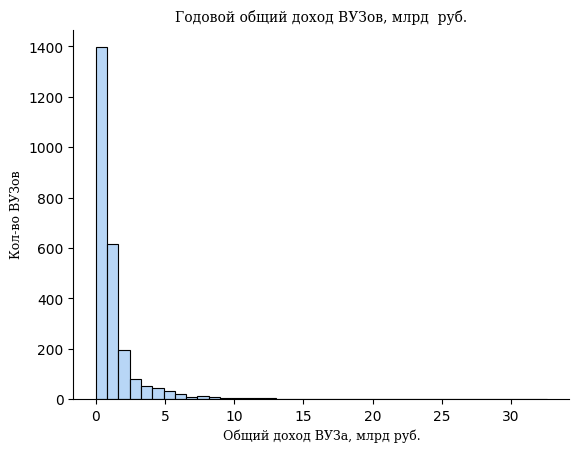

In [31]:
# Построим график распределения дохода ВУЗов
plt.ticklabel_format(style='plain')
ax = sns.histplot(data=education, x='total_income', bins=40)
plt.xlabel('Общий доход ВУЗа, млрд руб.', fontfamily='serif', fontsize=9)
plt.ylabel('Кол-во ВУЗов', fontfamily='serif', fontsize=9)
plt.title('Годовой общий доход ВУЗов, млрд  руб.', fontfamily='serif', fontsize=10)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False);


Большинство ВУЗов имеют годовой общий доход до 2,5 млрд руб.



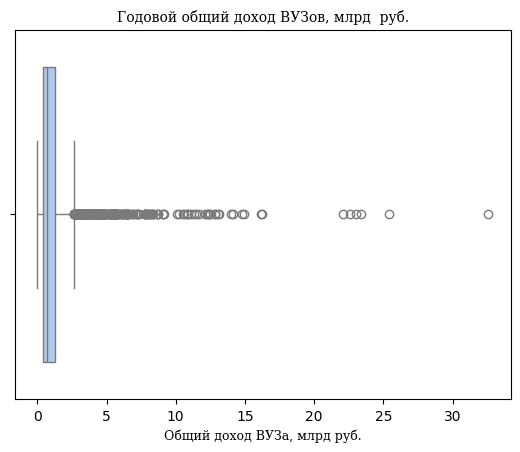

In [32]:
# Построим ящик с усами по доходу ВУЗов для большей наглядности.
plt.ticklabel_format(style='plain')
sns.boxplot(data=education, x='total_income')
plt.xlabel('Общий доход ВУЗа, млрд руб.', fontfamily='serif', fontsize=9)
plt.title('Годовой общий доход ВУЗов, млрд  руб.', fontfamily='serif', fontsize=10);

На данном графике хорошо видны выбросы. Их немало.

In [33]:
# Посмотрим на ВУЗ с максимальным доходом в датасете
education[education['total_income']>30]

federal_district region_name    id  \
2275   Центральный ФО   г. Москва  1985   

                                                                                                                                                     name  \
2275  Федеральное государственное бюджетное образовательное учреждение высшего профессионального образования «Российская школа частного права (институт)»   

                                            name_short  year   e1   e2   e3  \
2275  Российская школа частного права (институт), РШЧП  2014 0.00 0.00 0.00   

             e4    e5   e6    e8  ege_budg  wos  scopus  rsci  rnd  \
2275 1305943.43 64.50 0.00 34.52      0.00 0.00    0.00 65.05 0.00   

      total_income  square  phd_share  pps  rnd_private    pk  
2275         32.58    1242      87.88   35         0.00 63.00

Максимальный годовой общий доход в 32,6 млрд руб., включая средства бюджетного финансирования, имеет Российская школа частного права

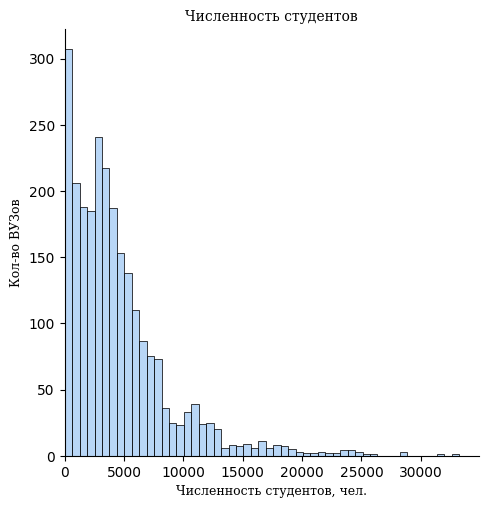

In [34]:
# Построим график распределения численности студентов
sns.displot(data=education, x='pk').set(xlim=0)
#plt.yticks([])
plt.xlabel('Численность студентов, чел.', fontfamily='serif', fontsize=9)
plt.ylabel('Кол-во ВУЗов', fontfamily='serif', fontsize=9)
plt.title('Численность студентов', fontfamily='serif', fontsize=10);



Численность студентов большинства ВУЗов не превышает 10 000 человек.

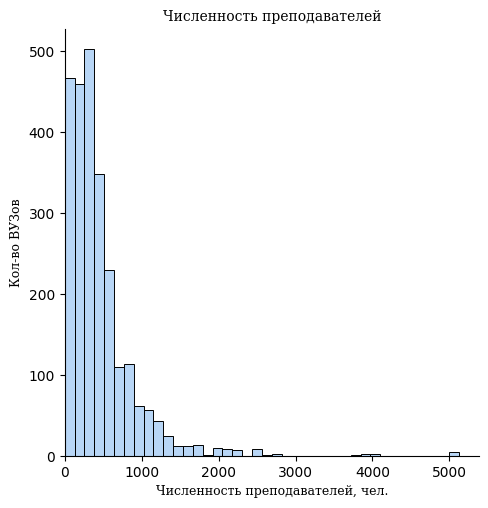

In [117]:
# Численность преподавателей
sns.displot(data=education, x='pps', bins=40).set(xlim=0)
#plt.yticks([])
plt.xlabel('Численность преподавателей, чел.', fontfamily='serif', fontsize=9)
plt.ylabel('Кол-во ВУЗов', fontfamily='serif', fontsize=9)
plt.title('Численность преподавателей', fontfamily='serif', fontsize=10);

В большинстве ВУЗов численность преподвателей не превышает 1200 человек.

## Bivariate/Multivariate analysis - Двумерный/Многомерный анализ


In [35]:
# Посчитаем, сколько ВУЗов приняли участие в мониторинге в каждый из представленых лет
education.groupby('year')['name_short'].count()


year
2013    539
2014    529
2015    448
2016    501
2017    480
Name: name_short, dtype: int64

В каждый год с 2013 по 2017 в мониторинге участвовало примерно одинаковое число ВУЗов

In [36]:
# Посмотрим распределение ВУЗов по федеральным округам.
a = education.groupby('federal_district')['name'].count().sort_values(ascending= False)

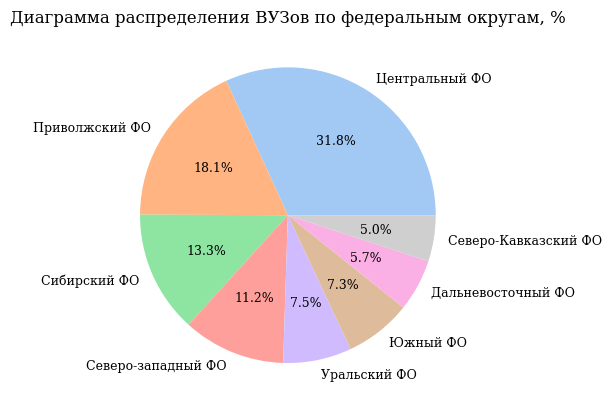

In [37]:
# Построим круговую диаграмму распределения ВУЗов по федеральным округам.
sizes = a.values
labels = a.index
colors = sns.color_palette('pastel')
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 9, 'fontfamily': 'serif'})
plt.title('Диаграмма распределения ВУЗов по федеральным округам, %', fontfamily='serif');

# arrowprops=dict(arrowstyle="-")

Шире всего в датасете представлены ВУЗы Центрального, Приволжского, Сибирского и Северо-Западного федеральных округов.

In [38]:
# Рассмотрим взаимосвязь федерального округа и среднего показателя общего дохода ВУЗа.
education.groupby('federal_district')['total_income'].mean().sort_values(ascending=False)

federal_district
Центральный ФО         1.65
Северо-западный ФО     1.61
Дальневосточный ФО     1.17
Сибирский ФО           1.16
Уральский ФО           1.08
Приволжский ФО         1.06
Южный ФО               1.01
Северо-Кавказский ФО   0.72
Name: total_income, dtype: float64

Самый большой доход получают ВУЗы Центрального и Северо-Западного округа, самый маленький - Северо-Кавказского федерального округа.

In [106]:
# Рассмотрим взаимосвязь федерального округа и среднего показателя дохода от НИОКР (научно-сследовательских и опытно-конструкторских работ)
education.groupby('federal_district')['rnd_private'].mean().sort_values(ascending=False)

federal_district
Северо-западный ФО     92.15
Центральный ФО         90.48
Сибирский ФО           66.97
Приволжский ФО         63.82
Южный ФО               49.01
Уральский ФО           48.01
Дальневосточный ФО     32.21
Северо-Кавказский ФО   26.20
Name: rnd_private, dtype: float64

Самый большой доход от НИОКР получают ВУЗы Северо-Западного, Центрального и Сибирского федеральных округов.

In [107]:
# Создадим датафрейм с распределением по федеральным округам общего дохода ВУЗов, дохода от НИОКР
income = education.groupby('federal_district').agg({'total_income':'mean', 'rnd_private':'mean'}).sort_values(
                                      ['total_income', 'rnd_private'], ascending=[False, False])
income['rnd_private'] = income['rnd_private']/1_000
income

total_income  rnd_private
federal_district                               
Центральный ФО                1.65         0.09
Северо-западный ФО            1.61         0.09
Дальневосточный ФО            1.17         0.03
Сибирский ФО                  1.16         0.07
Уральский ФО                  1.08         0.05
Приволжский ФО                1.06         0.06
Южный ФО                      1.01         0.05
Северо-Кавказский ФО          0.72         0.03

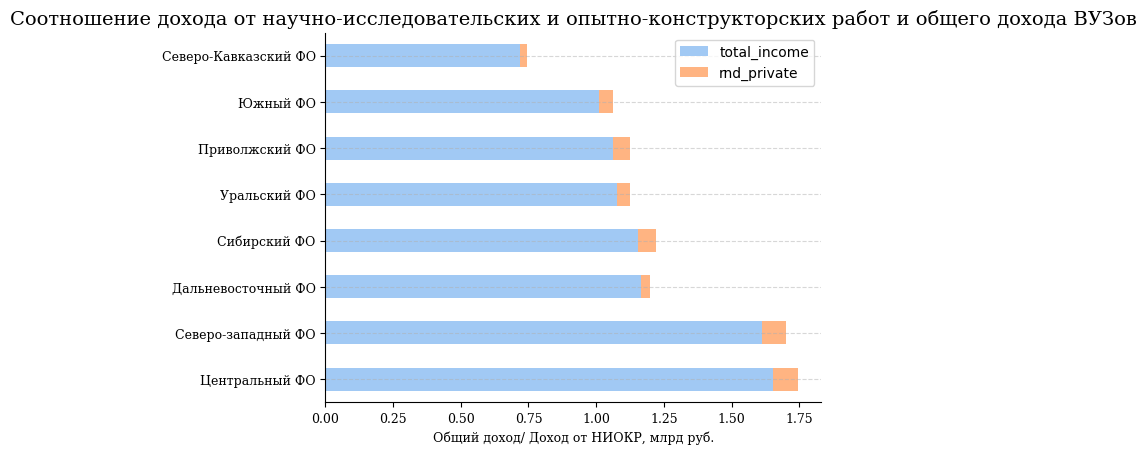

In [112]:
ax = income.plot(kind='barh', stacked=True)
plt.title('Соотношение дохода от научно-исследовательских и опытно-конструкторских работ и общего дохода ВУЗов', fontsize=14, fontfamily='serif')
plt.ylabel('')
plt.xlabel('Общий доход/ Доход от НИОКР, млрд руб.', fontfamily='serif', fontsize=9)
plt.xticks(fontfamily='serif', fontsize=9)
plt.yticks(fontfamily='serif', fontsize=9)
ax.grid(axis='y', linestyle='--', alpha=0.5)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False);

Как видно из графика, доход от научно-исследовательских и опытно-конструкторских работ составляет небольшую часть общего дохода ВУЗов.

In [42]:
# Посчитаем долю дохода от НИОКР (в %) в общем доходе по федеральным округам.
income['rnd_private_share'] = (income['rnd_private']/income['total_income']*100)
income.reset_index().sort_values(by=['rnd_private_share'], ascending=False)


federal_district  total_income  rnd_private  rnd_private_share
5        Приволжский ФО          1.06         0.06               6.00
3          Сибирский ФО          1.16         0.07               5.79
1    Северо-западный ФО          1.61         0.09               5.72
0        Центральный ФО          1.65         0.09               5.47
6              Южный ФО          1.01         0.05               4.84
4          Уральский ФО          1.08         0.05               4.46
7  Северо-Кавказский ФО          0.72         0.03               3.65
2    Дальневосточный ФО          1.17         0.03               2.76

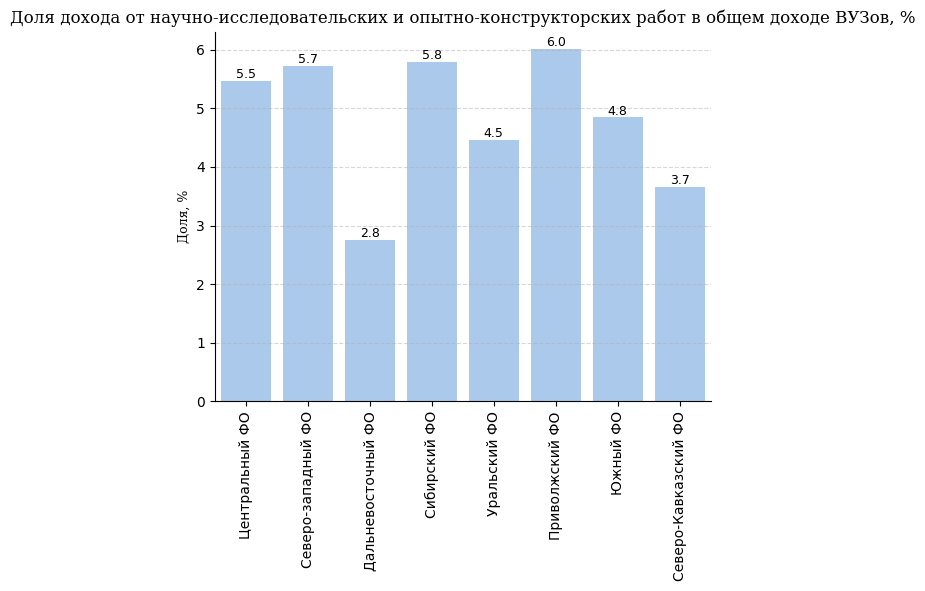

In [43]:
# Отобразим долю дохода от НИОКР на графике
ax = sns.barplot(data=income, x='federal_district', y='rnd_private_share')
ax.bar_label(ax.containers[0], fontsize=9, fmt='%.1f')
ax.set_title('Доля дохода от научно-исследовательских и опытно-конструкторских работ в общем доходе ВУЗов, %', fontfamily='serif')
ax.set_xlabel('')
ax.set_ylabel('Доля, %', fontfamily='serif', fontsize=9)
ax.grid(axis='y', linestyle='--', alpha=0.5)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.xticks(rotation=90);

Самая высокая доля доходов от НИОКР в общем доходе наблюдается у ВУЗов Приволжского, Сибирского и Северо-Западного округов, самая низкая - в Далльневосточном федеральном округе.

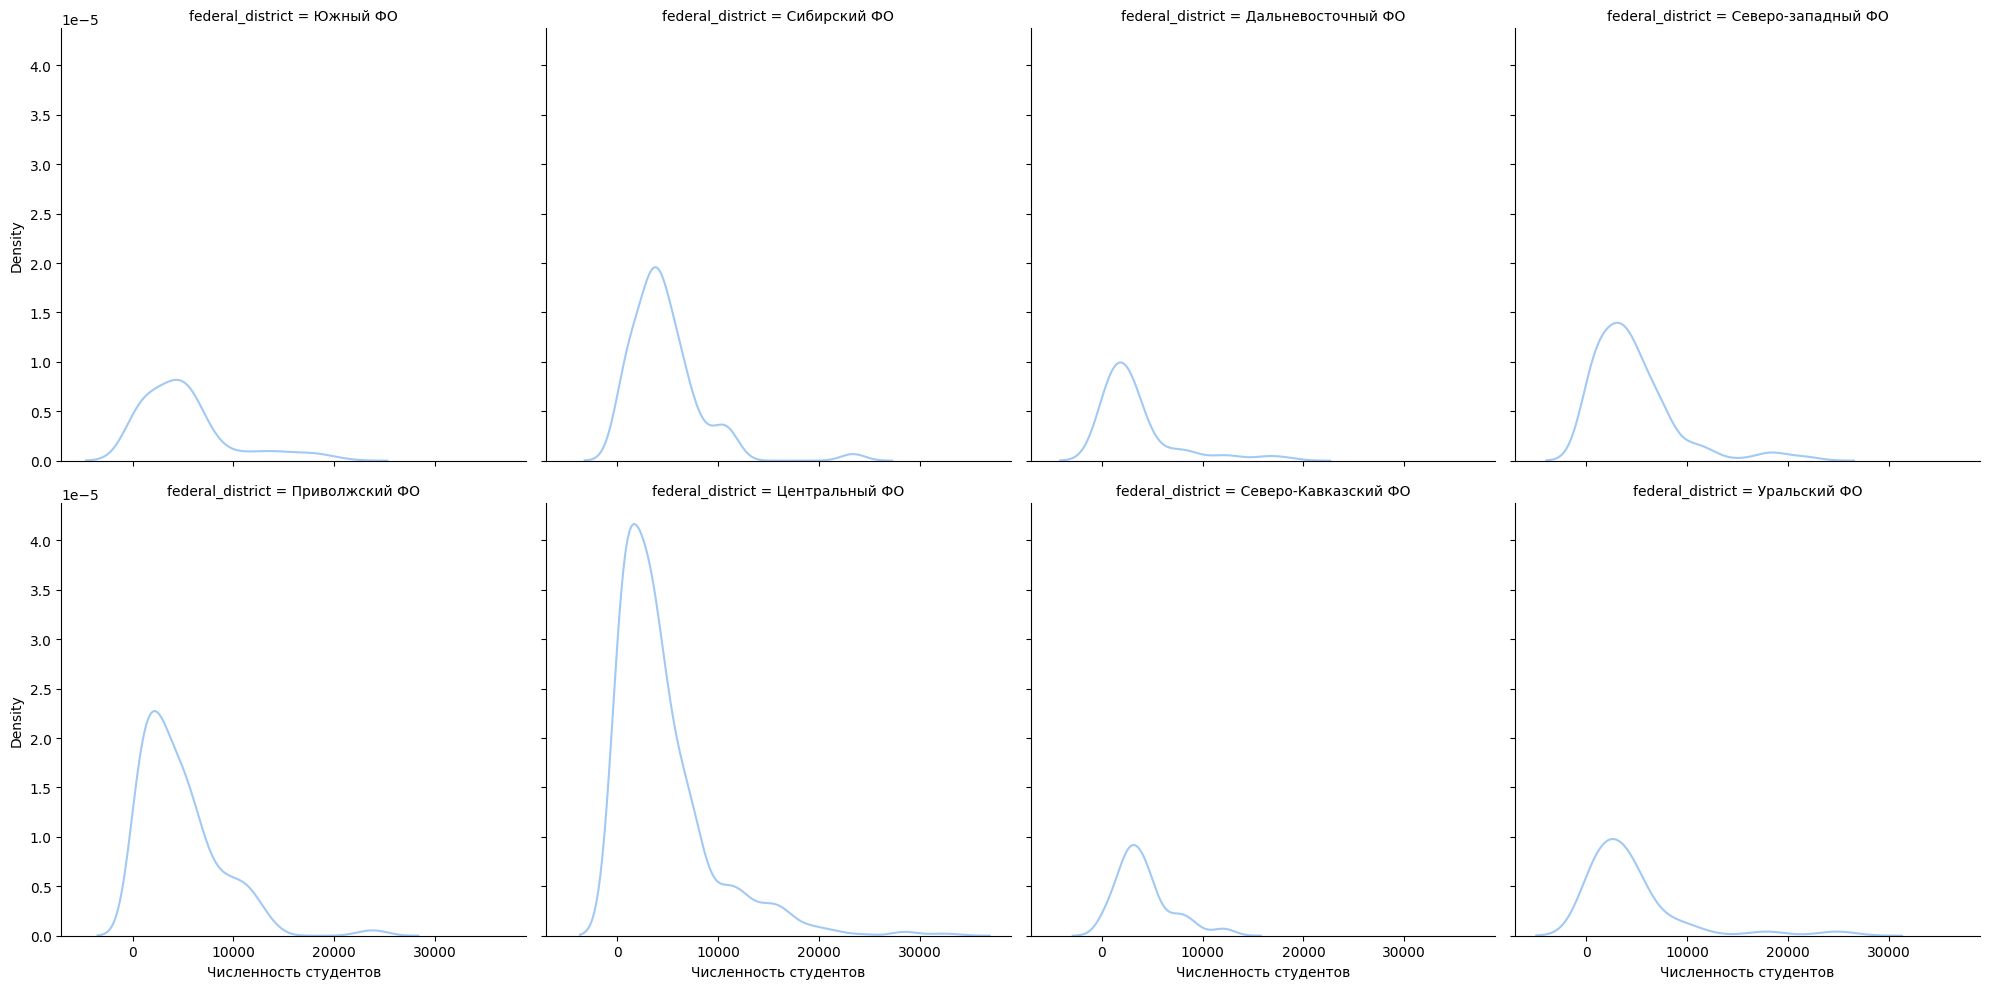

In [44]:
# Посмотрим распределение общего числа студентов по федеральным округам.
g = sns.displot(kind='kde', data=education, x='pk', col='federal_district', col_wrap=4)
g.set_axis_labels("Численность студентов");

В основном в ВУЗах по всем федеральным округам учится от 2 до 10 тыс.студентов.

In [45]:
# Посмотрим распределение результатов ЕГЭ по округам
education.groupby('federal_district')['ege_budg'].mean().sort_values(ascending=False)

federal_district
Северо-западный ФО     68.86
Центральный ФО         66.22
Уральский ФО           64.46
Приволжский ФО         64.31
Сибирский ФО           64.21
Южный ФО               63.97
Северо-Кавказский ФО   59.37
Дальневосточный ФО     59.22
Name: ege_budg, dtype: float64

Самый высокий балл ЕГЭ - у студентов Северо-Западного и Центрального федерального округов, самый низкий - у студентов Дальневосточного округа.
В целом значения среднего балла во всех округах не значительно отличаются друг от друга. Небольшой отрыв двух вышеуказанных федеральных округов может быть связан с тем, что там находятся самые престижные ВУЗы страны, предъявляющие к абитуриентам более высокие требования.

In [46]:
# Рассмотрим три информационно-аналитические системы научного цитирования: wos, scopus и rsci
# Посчитаем суммарное количество публикаций каждого ВУЗа в данных системах.
education['total_publications'] = education['wos'] + education['scopus'] + education['rsci']


In [47]:
# Выберем 10 ВУЗов с наибольшим числом публикаций и поместим в отдельный датафрейм
max_count_publ = education.groupby('name_short').agg({'total_publications':'sum', 'wos':'sum',
                                                 'scopus':'sum', 'rsci':'sum'}).sort_values(by=['total_publications'],
                                                  ascending=False).iloc[0:10].reset_index()
max_count_publ

name_short  \
0                                                                   Московский государственный университет имени М.В. Ломоносова, МГУ имени М.В.Ломоносова, Московский  университет или МГУ   
1                                                                                                                                                    Финансовый университет, Финуниверситет   
2                                                                                                 Санкт-Петербургский государственный университет, Санкт-Петербургский  университет,  СПбГУ   
3  ФГАОУ ВО «Казанский (Приволжский) федеральный университет», ФГАОУ ВО КФУ, КФУ, Казанский федеральный университет, Казанский университет, Казанский (Приволжский) федеральный университет   
4                                                                                                                                                        ФГБОУ ВПО «РЭУ им. Г.В. Плеханова»   
5                                                                                                                                        Южный федеральный университет, ФГАОУ ВО «ЮФУ», ЮФУ   
6                                                                               РУДН; Российский университет дружбы народов; ФГАОУ ВО РУДН; ФГАУ ВО «Российский университет дружбы народов»   
7                                                                      Национальный исследовательский Томский государственный университет, Томский государственный университет, НИ ТГУ, ТГУ   
8                                                                                     ФГАОУ ВО «УрФУ имени первого Президента России Б.Н. Ельцина», Уральский федеральный университет, УрФУ   
9                                                             ФГАОУ ВО НИ ТПУ, ТПУ, Национальный исследовательский Томский политехнический университет, Томский политехнический университет   

   total_publications      wos   scopus     rsci  
0            58862.06 13256.79 15837.16 29768.10  
1            52017.24   628.77   588.94 50799.53  
2            48916.35  9257.18 11255.84 28403.33  
3            37281.33  5129.52  7492.01 24659.79  
4            36646.08   574.73  1083.55 34987.80  
5            35213.10  2594.05  3760.34 28858.71  
6            32561.69  2140.20  2664.06 27757.44  
7            30812.26  7279.15  7269.06 16264.06  
8            28867.71  4890.49  6004.05 17973.17  
9            28561.74  5973.86  7725.01 14862.86

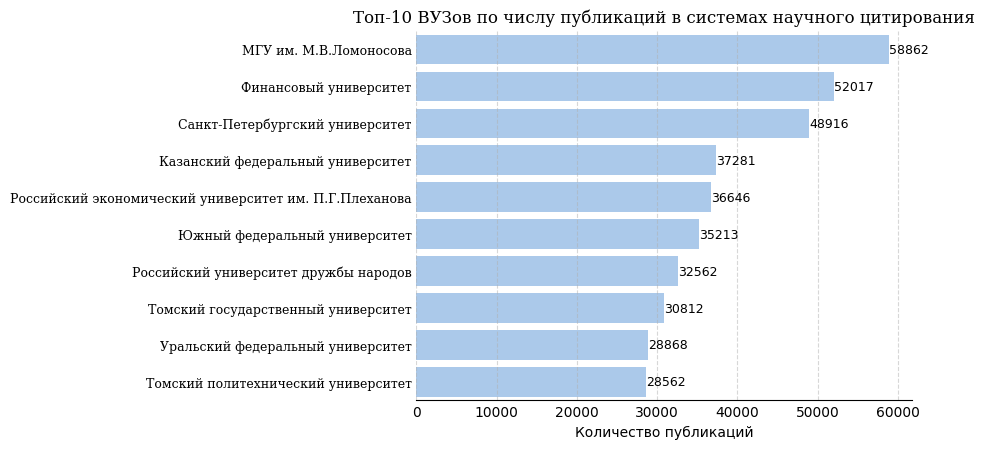

In [48]:
# Построим cтолбчатую диаграмму 10 университетов с наибольшим числом публикаций в системах цитирования

universities = ['МГУ им. М.В.Ломоносова', 'Финансовый университет', 'Санкт-Петербургский университет', 'Казанский федеральный университет',
               'Российский экономический университет им. П.Г.Плеханова', 'Южный федеральный университет', 'Российский университет дружбы народов',
               'Томский государственный университет', 'Уральский федеральный университет', 'Томский политехнический университет']


fig, ax = plt.subplots()
sns.barplot(x=max_count_publ['total_publications'], y=universities, orient='h')
plt.title('Топ-10 ВУЗов по числу публикаций в системах научного цитирования', fontfamily='serif')
plt.yticks(fontfamily='serif', fontsize=9)
sns.despine()
ax.grid(axis='x', linestyle='--', alpha=0.5)

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.bar_label(ax.containers[0], fontsize=9, fmt='%.0f')
ax.set_xlabel('Количество публикаций')
ax.tick_params(axis='both', which='both', length=0)

plt.show()

Наибольшее число публикаций по трем системам научного цитирования - у МГУ, Финансового университета и Санкт-Петербургского университета.

In [49]:
# Посмотрим, в ВУЗах каких субъектов РФ в 2017 году была самая высокая доля студентов-иностранцев
foreign_stud_by_region = education[education['year']==2017].sort_values(by=['e3'], ascending=False).iloc[0:10].groupby('region_name')['e3'].sum().sort_values(ascending=False)
foreign_stud_by_region

region_name
г. Москва                         53.78
Курская область                   37.21
Астраханская область              35.26
Оренбургская область              34.04
Карачаево-Черкесская Республика   33.95
Орловская область                 29.68
Костромская область               29.27
Томская область                   27.34
Тверская область                  26.37
Name: e3, dtype: float64

In [87]:
# Посмотрим, много ли ВУЗов, в которых не обучаются иностранные граждане в 2017 году
education[(education['year']==2017) & (education['e3']==0)]
# Всего в двух ВУЗах таких студентов нет

federal_district                       region_name      id  \
2122   Приволжский ФО                     Пермский край    1775   
2443   Приволжский ФО  Республика Татарстан (Татарстан)  110339   

                                                                                                                                                  name  \
2122    Федеральное государственное бюджетное образовательное учреждение высшего образования «Чайковский государственный институт физической культуры»   
2443  Государственное автономное образовательное учреждение высшего образования «Набережночелнинский государственный торгово-технологический институт»   

                                                                                           name_short  \
2122                                                                                 ФГБОУ ВО «ЧГИФК»   
2443  ГАОУ ВО «НГТТИ»; ГАОУ ВО «Набережночелнинский государственный торгово-технологический институт»   

      year    e1     e2   e3       e4     e5    e6   e8  ege_budg  wos  \
2122  2017 67.00   7.18 0.00  6070.41 209.31 75.00 5.33     58.58 0.00   
2443  2017  0.00 175.30 0.00 11136.09 115.33 85.00 2.81      0.00 0.00   

      scopus  rsci  rnd  total_income  square  phd_share  pps  rnd_private  \
2122    3.57 39.28 0.46          0.39   22228      54.58   57         0.02   
2443    0.91 45.45 1.35          0.09   11337      75.41    7         1.23   

         pk  total_publications e6_group  
2122 514.10               42.85    70-80  
2443  48.20               46.36    80-90

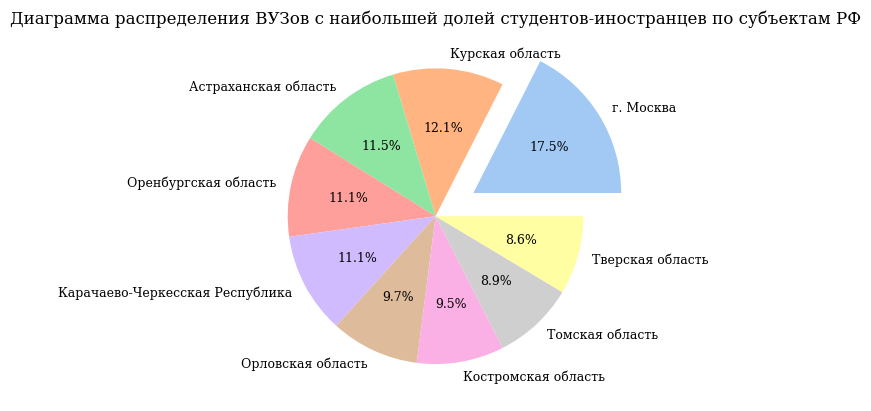

In [50]:
# Построим круговую диаграмму распределения ВУЗов с наибольшей долей студентов-иностранцев по субъектам РФ
sizes = foreign_stud_by_region.values
labels = foreign_stud_by_region.index
colors = sns.color_palette('pastel')
expl = [0.3, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(sizes, labels=labels, explode=expl, autopct='%1.1f%%', textprops={'fontsize': 9, 'fontfamily': 'serif'})
plt.title('Диаграмма распределения ВУЗов с наибольшей долей студентов-иностранцев по субъектам РФ', fontfamily='serif');

Больше всего студентов - иностранных граждан учится в ВУЗах г.Москвы, Курской, Астраханской, Оренбургской областей, Карачаево-Черкесской Республики.

In [51]:
# Посмотрим, в каких ВУЗах в 2017 году была самая высокая доля студентов-иностранцев
foreign_stud_by_univ_2017 = education[education['year']==2017].sort_values(by=['e3'], ascending=False).iloc[0:10].groupby(['region_name', 'name_short'])['e3'].sum().sort_values(ascending=False)
foreign_stud_by_univ_2017

region_name                      name_short                                                                                                                                               
Курская область                  ФГБОУ ВО КГМУ Минздрава  России                                                                                                                             37.21
Астраханская область             ФГБОУ ВО Астраханский ГМУ Минздрава России                                                                                                                  35.26
Оренбургская область             ФГБОУ ВО ОрГМУ Минздрава  России                                                                                                                            34.04
Карачаево-Черкесская Республика  КЧГУ, «Карачаево-Черкесский государственный университет имени У.Д. Алиева», ФГБОУ ВО «Карачаево-Черкесский государственный университет имени У.Д. Алиева»   33.95
Орловская область                

Из десяти ВУЗов с наибольшей долей студентов-иностранцев в 2017 году 4 медицинских. Посмотрим, так ли это в предыдущие годы.


In [52]:
# 2016 год
foreign_stud_by_univ_2016 = education[education['year']==2016].sort_values(by=['e3'], ascending=False).iloc[0:10].groupby(['region_name', 'name_short'])['e3'].sum().sort_values(ascending=False)
foreign_stud_by_univ_2016

region_name                      name_short                                                                                                                                               
Курская область                  ФГБОУ ВО КГМУ Минздрава  России                                                                                                                             33.62
Астраханская область             ФГБОУ ВО Астраханский ГМУ Минздрава России                                                                                                                  29.87
Карачаево-Черкесская Республика  КЧГУ, «Карачаево-Черкесский государственный университет имени У.Д. Алиева», ФГБОУ ВО «Карачаево-Черкесский государственный университет имени У.Д. Алиева»   29.34
г. Москва                        ФГБОУ ВО «Гос. ИРЯ им. А.С. Пушкина»                                                                                                                        28.50
Тверская область                 

In [53]:
# 2015 год
foreign_stud_by_univ_2015 = education[education['year']==2015].sort_values(by=['e3'], ascending=False).iloc[0:10].groupby(['region_name', 'name_short'])['e3'].sum().sort_values(ascending=False)
foreign_stud_by_univ_2015

region_name                      name_short                                                                                                                                                                            
Курская область                  ФГБОУ ВО КГМУ Минздрава  России                                                                                                                                                          31.80
Карачаево-Черкесская Республика  КЧГУ, «Карачаево-Черкесский государственный университет имени У.Д. Алиева», ФГБОУ ВО «Карачаево-Черкесский государственный университет имени У.Д. Алиева»                                27.89
Тверская область                 ФГБОУ ВО Тверской ГМУ Минздрава России                                                                                                                                                   26.62
Ивановская область               ФГБОУ ВО Ивановская ГСХА                                                       

Результат такой же: 40% ВУЗов из топ-10 - медицинской направленности

In [54]:
# Разделим непрерывные данные столбца е6 на группы
education['e6_group'] = pd.cut(education['e6'],
                               bins=[-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                               labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

In [55]:
# Определим ВУЗы, в которых в 2017 году величина коэффициента, равного отношению численности трудоустроившихся в течение календарного года,
# следующего за годом выпуска, выпускников, к общей численности выпускников года, предшествующего отчетному, была в интервале от 90 до 100 (e6).
univ_by_job_2017 = education[(education['e6_group']=='90-100') & (education['year']==2017)]

In [56]:
# Список ВУЗов с 90-100%-ной вероятностью трудоустройства в первый год после окончания (за 2017 год)
list(univ_by_job_2017['name'])

['Федеральное государственное бюджетное образовательное учреждение высшего образования «Пермская государственная фармацевтическая академия» Министерства здравоохранения Российской Федерации',
 'Федеральное государственное бюджетное образовательное учреждение высшего образования «Северный государственный медицинский университет» Министерства здравоохранения Российской Федерации',
 'Федеральное государственное бюджетное образовательное учреждение высшего образования «Ижевская государственная медицинская академия» Министерства здравоохранения Российской Федерации',
 'Федеральное государственное бюджетное образовательное учреждение высшего образования «Кировский государственный медицинский университет» Министерства здравоохранения Российской Федерации',
 'Федеральное государственное бюджетное образовательное учреждение высшего образования «Тюменский государственный медицинский университет» Министерства здравоохранения Российской Федерации',
 'Федеральное государственное бюджетное образоват

Музыканты и медики с 90-100 % вероятностью устраивались на работу в первый год после обучения

In [57]:
# Список ВУЗов со 90-100%ной вероятностью трудоустройства в первый год после окончания (за 2016 год)
univ_by_job_2016 = education[(education['e6_group']=='90-100') & (education['year']==2016)]
list(univ_by_job_2016['name'])

['Федеральное государственное бюджетное образовательное учреждение высшего образования «Пермская государственная фармацевтическая академия» Министерства здравоохранения Российской Федерации',
 'Федеральное государственное бюджетное образовательное учреждение высшего образования «Северный государственный медицинский университет» Министерства здравоохранения Российской Федерации',
 'Федеральное государственное бюджетное образовательное учреждение высшего образования "Иркутский государственный медицинский университет" Министерства здравоохранения Российской Федерации',
 'Государственное бюджетное образовательное учреждение высшего образования «Высшая школа музыки Республики Саха (Якутия) (институт) имени В.А. Босикова»',
 'Государственное бюджетное образовательное учреждение высшего образования Челябинской области «Магнитогорская государственная консерватория (академия) имени М.И. Глинки»']

То же самое, что и в 2017

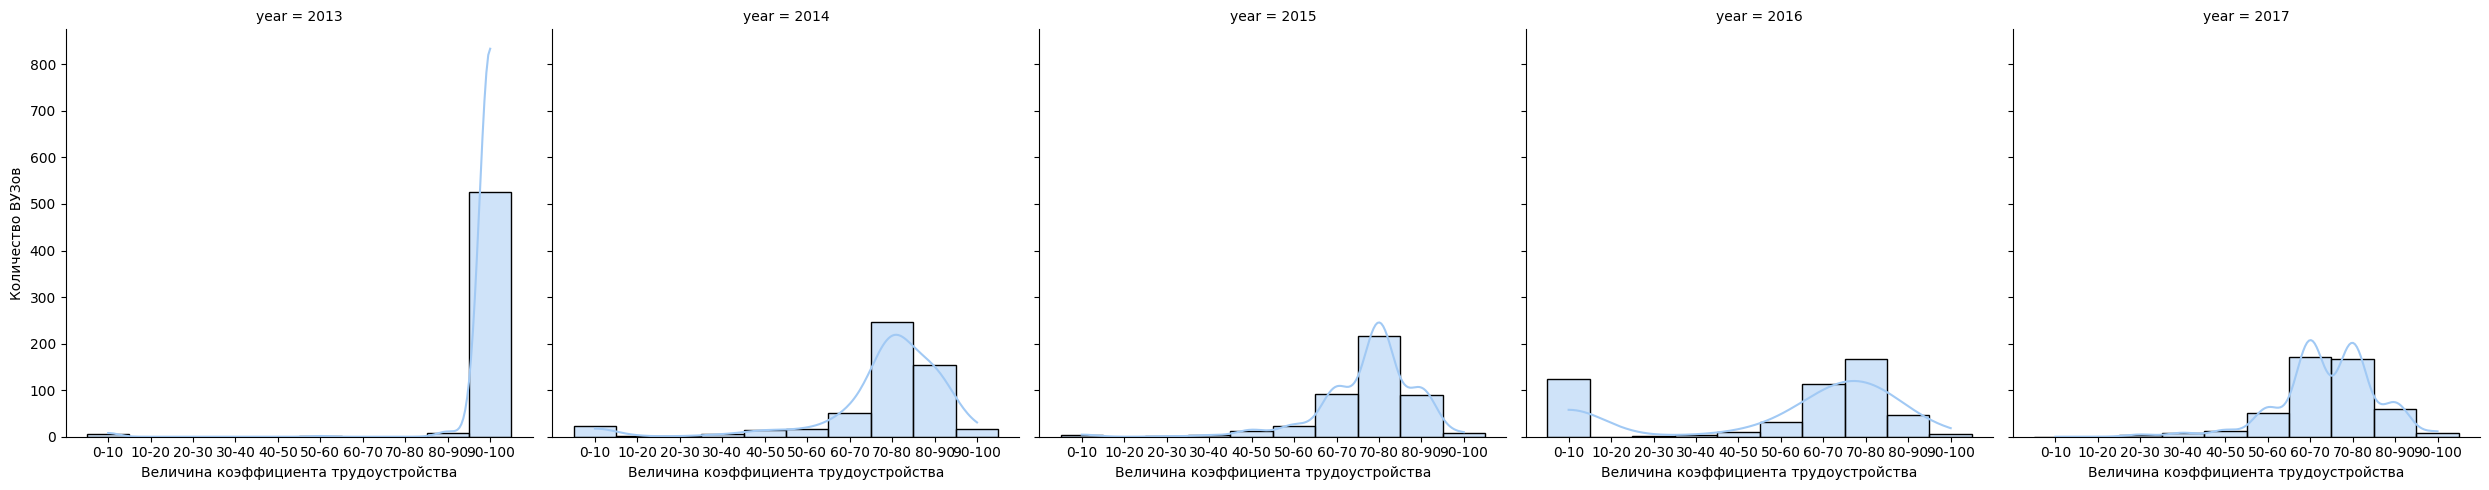

In [58]:
# Посмотрим распределение коэффициента трудоустройства в первый год после выпуска в разные годы проведения мониторинга
g = sns.displot(data=education, x='e6_group', col='year', kde=True)
g.set_axis_labels("Величина коэффициента трудоустройства", "Количество ВУЗов");

В 2013 году коэффициент трудоустройства в первый год после выпуска был максимально высоким, в последующие годы остался на высоком уровне в интервале от 65 до 85. В 2016 году низкий процент трудоустройства (до 10%) возрос по сравнению с остальными годами.

In [59]:
# Посмотрим на распределение коэффициента отношения численности работников ППС, имеющих ученую степень, к численности студентов по регионам (e8)
education[education['year']==2017].groupby('region_name')['e8'].mean().sort_values(ascending=False).iloc[0:10]

region_name
Тюменская область          52.05
Кировская область          45.33
Оренбургская область       43.78
Смоленская область         43.54
Республика Саха (Якутия)   42.30
Челябинская область        40.74
Архангельская область      37.69
Костромская область        35.89
Рязанская область          35.52
Забайкальский край         35.01
Name: e8, dtype: float64

Самая высокая доля преподавателей с ученой степенью в 2017 году - в Тюменской области.

In [60]:
# Посмотрим, в каких ВУЗах за весь период мониторинга данный коэффициент был самым высоким
top_e8 = education.sort_values(by=['e8'], ascending=False).iloc[0:10]
top_e8['name'].unique()

array(['Федеральное государственное бюджетное образовательное учреждение высшего образования «Московская государственная консерватория имени П.И.Чайковского»',
       'Федеральное государственное бюджетное образовательное учреждение высшего образования «Санкт-Петербургский государственный педиатрический медицинский университет» Министерства здравоохранения Российской Федерации',
       'Федеральное государственное бюджетное образовательное учреждение высшего образования "Дагестанский государственный медицинский университет" Министерства здравоохранения Российской Федерации',
       'Муниципальное бюджетное образовательное учреждение высшего образования городского округа Тольятти «Тольяттинская консерватория»',
       'Федеральное государственное бюджетное образовательное учреждение высшего образования «Ростовская государственная консерватория им. С.В.Рахманинова»',
       'Федеральное государственное бюджетное образовательное учреждение высшего образования «Московская государственная а

Самая высокая доля преподавателей с ученой степенью в медицинских ВУЗах и консерваториях.

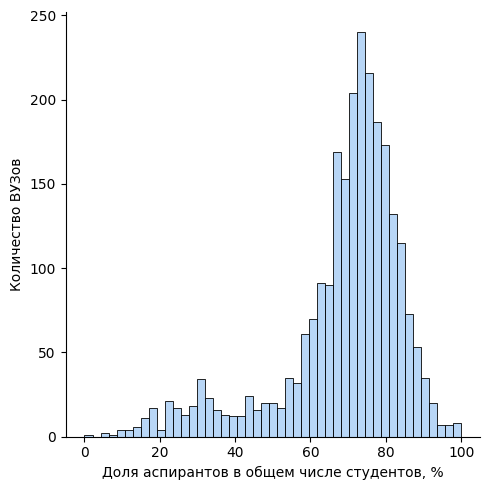

In [61]:
# Доля численности будущих научно-педагогических кадров (обучающихся в аспирантуре, ординатуре и т.д.) в общей численности обучающихся (phd_share) по ФО и годам
g = sns.displot(data=education, x='phd_share')
g.set_axis_labels("Доля аспирантов в общем числе студентов, %", "Количество ВУЗов");

In [62]:
# Отпределим топ-10 регионов по уровню зарплат преподавателей за 2017 год
salary_by_region = education[education['year']==2017].sort_values(by=['e5'], ascending=False).iloc[0:10].groupby('region_name')['e5'].mean().sort_values(ascending=False)
salary_by_region

region_name
Пермский край         264.52
Саратовская область   251.15
г. Санкт-Петербург    245.78
Самарская область     241.07
Краснодарский край    240.83
Московская область    235.80
г. Москва             234.73
Республика Дагестан   233.36
Name: e5, dtype: float64

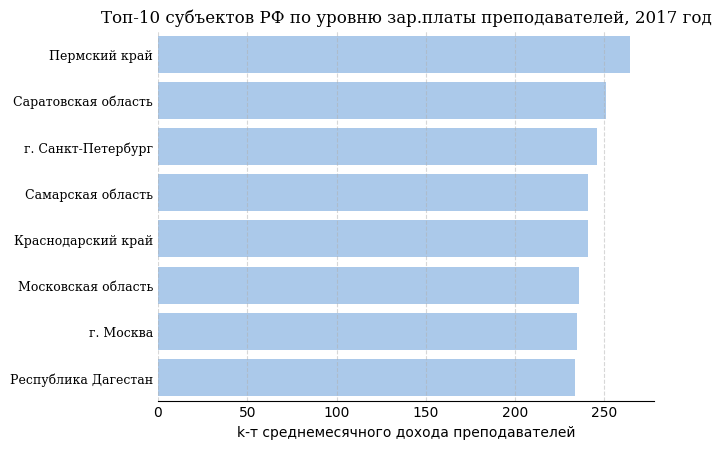

In [63]:
# Построим столбчатую диаграмму
fig, ax = plt.subplots()
sns.barplot(x=salary_by_region.values, y=salary_by_region.index, orient='h')
plt.title('Топ-10 субъектов РФ по уровню зар.платы преподавателей, 2017 год', fontfamily='serif')
plt.yticks(fontfamily='serif', fontsize=9)
sns.despine()
ax.grid(axis='x', linestyle='--', alpha=0.5)

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xlabel('k-т среднемесячного дохода преподавателей')
ax.set_ylabel('')
ax.tick_params(axis='both', which='both', length=0)

plt.show()

In [64]:
# Отпределим топ-5 ВУЗов по уровню зарплат преподавателей за 2017 год
salary_by_univ = education[education['year']==2017].sort_values(by=['e5'], ascending=False).iloc[0:5]


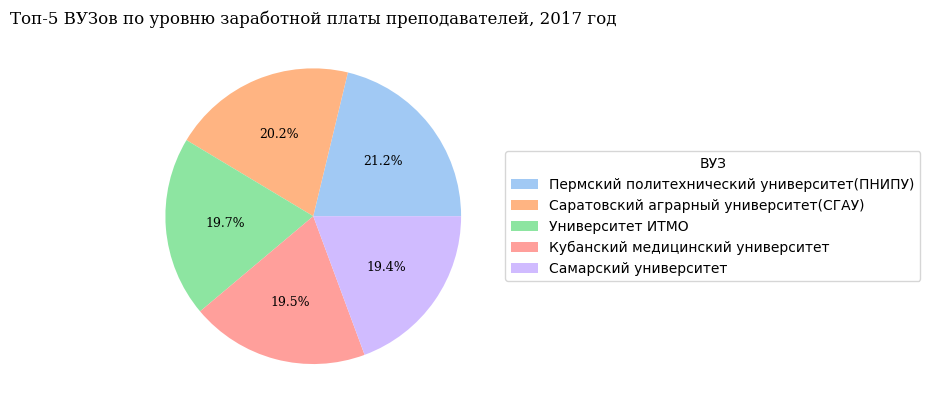

In [65]:
# Построим круговую  диаграмму
sizes = salary_by_univ['e5']
univ = ['Пермский политехнический университет(ПНИПУ)', 'Саратовский аграрный университет(СГАУ)', 'Университет ИТМО', 'Кубанский медицинский университет', 'Самарский университет']
colors = sns.color_palette('pastel')
plt.pie(sizes, autopct='%1.1f%%', textprops={'fontsize': 9, 'fontfamily': 'serif'})
plt.title('Топ-5 ВУЗов по уровню заработной платы преподавателей, 2017 год', fontfamily='serif')
plt.legend(title="ВУЗ",
           labels=univ,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1));

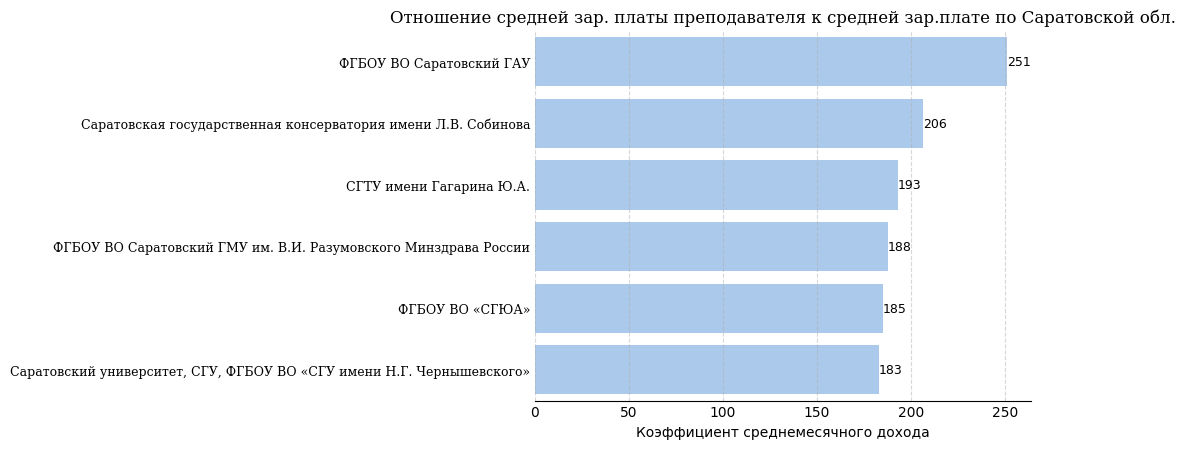

In [66]:
# Посмотрим, в каком ВУЗе Саратовской области в 2017 году был самый высокий и самый низкий уровень зарплат преподавателей
sar_region = education[(education['region_name']=='Саратовская область') & (education['year']==2017)].sort_values(by=['e5'], ascending=False)
# Построим столбчатую диаграмму
fig, ax = plt.subplots()
sns.barplot(x=sar_region['e5'], y=sar_region['name_short'], orient='h')
plt.title('Отношение средней зар. платы преподавателя к средней зар.плате по Саратовской обл.', fontfamily='serif')
plt.yticks(fontfamily='serif', fontsize=9)
sns.despine()
ax.grid(axis='x', linestyle='--', alpha=0.5)

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.bar_label(ax.containers[0], fontsize=9, fmt='%.0f')
ax.set_xlabel('Коэффициент среднемесячного дохода')
ax.set_ylabel('')
ax.tick_params(axis='both', which='both', length=0)

plt.show()

In [67]:
# Исключим из датафрейма для построения корреляционной матрицы ненужные столбцы.
education_truncated = education.drop(columns=['id', 'year', 'wos', 'scopus', 'rsci', ], axis=0)

<ipython-input-68-f6c908f95f3c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = education_truncated.corr()


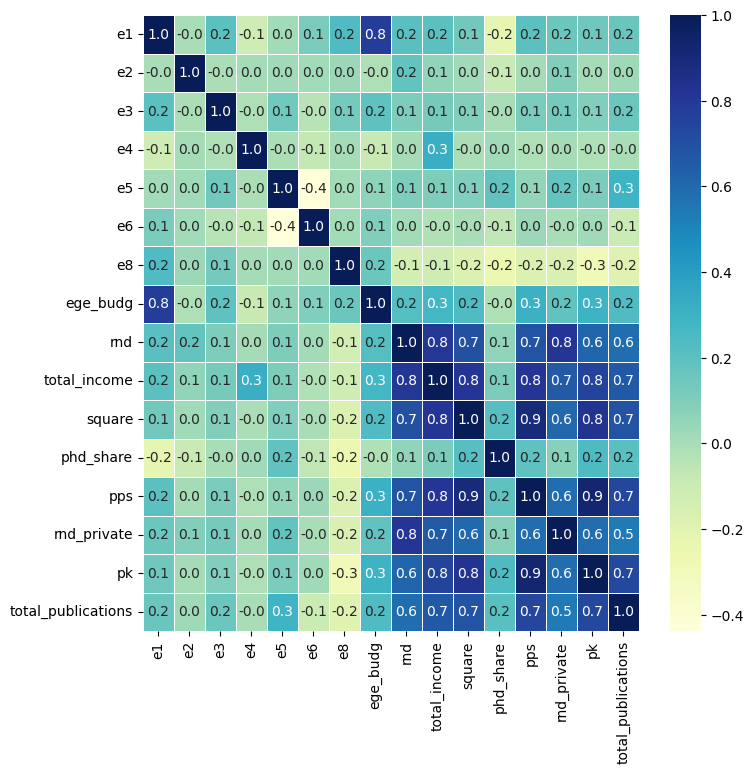

In [68]:
# Построим и визуализируем матрицу корреляции
corr_matrix = education_truncated.corr()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='YlGnBu', cbar=True, linewidth=0.5, ax=ax);

In [69]:
# Посмотрим на связь общего дохода ВУЗа с другими числовыми переменными
# total_income в сильной связи с rnd, total_publications, pk, pps, square

Наибольшая положительная связь  у общего дохода наблюдается с объемом НИОКР, кол-вом публикаций,численностью студентов, преподавателей, площадью учебно-лабораторных помещений

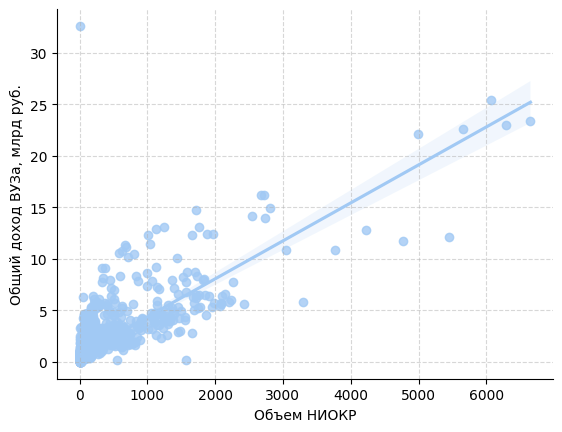

In [70]:
# Нарисуем регрессионную линию для связи между доходом и объемом научно-иссл. и опытно-констр.работ
plt.ticklabel_format(style='plain')
ax = sns.regplot(data=education, x='rnd', y='total_income')
plt.xlabel('Объем НИОКР')
plt.ylabel('Общий доход ВУЗа, млрд руб.')
ax.grid(linestyle='--', alpha=0.5)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False);

Общий доход ВУЗов находится в прямой зависимости от объема научно-исследовательскиъ работ.

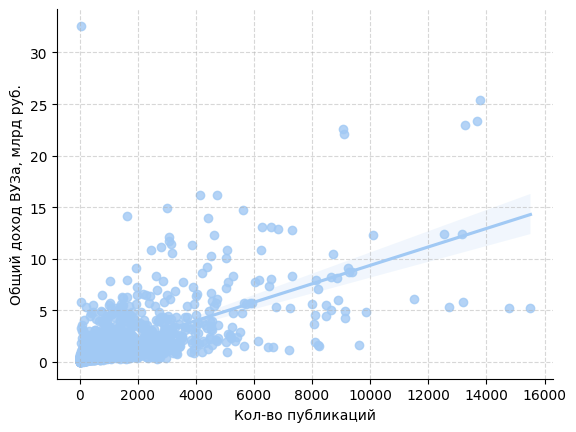

In [71]:
# Нарисуем регрессионную линию для связи между доходом и объемом публикаций
plt.ticklabel_format(style='plain')
ax = sns.regplot(data=education, x='total_publications', y='total_income')
plt.xlabel('Кол-во публикаций')
plt.ylabel('Общий доход ВУЗа, млрд руб.')
ax.grid(linestyle='--', alpha=0.5)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False);

В основной массе ВУЗов количество публикаций не превышает 4000, а общий доход - не больее 6 млрд руб.

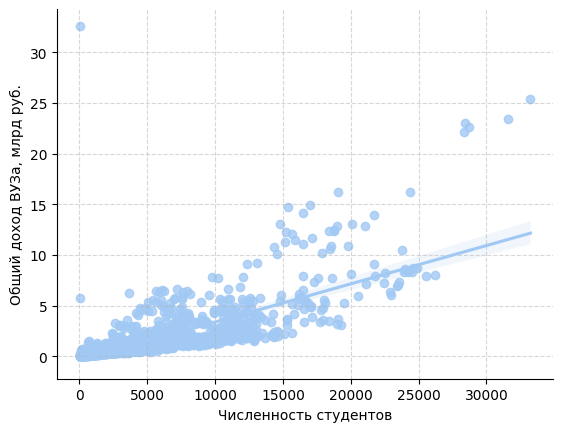

In [72]:
# Нарисуем регрессионную линию для связи между доходом и численностью студентов
plt.ticklabel_format(style='plain')
ax = sns.regplot(data=education, x='pk', y='total_income')
plt.xlabel('Численность студентов')
plt.ylabel('Общий доход ВУЗа, млрд руб.')
ax.grid(linestyle='--', alpha=0.5)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False);

В большинстве ВУЗов с доходом до 6 млрд руб. численность студентов не превыает 13000 человек.

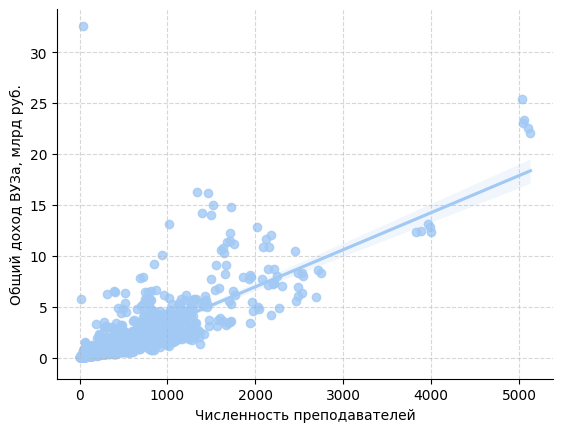

In [73]:
# Нарисуем регрессионную линию для связи между доходом и численностью ППС
plt.ticklabel_format(style='plain')
ax = sns.regplot(data=education, x='pps', y='total_income')
plt.xlabel('Численность преподавателей')
plt.ylabel('Общий доход ВУЗа, млрд руб.')
ax.grid(linestyle='--', alpha=0.5)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False);

В большинстве ВУЗов с общим доходом в 5 млрд руб. в год численность преподавателей не превышает 1400 человек.

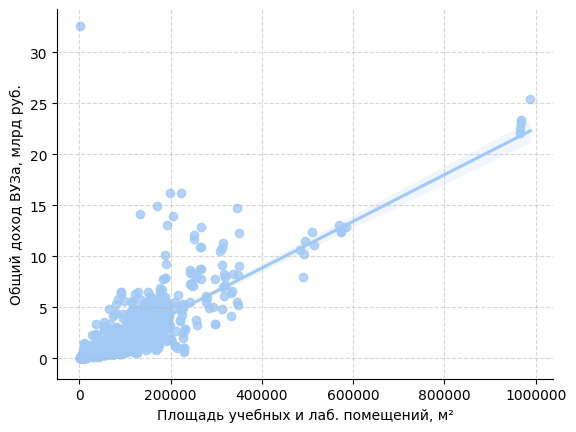

In [74]:
# Нарисуем регрессионную линию для связи между доходом и площадью помещений
plt.ticklabel_format(style='plain')
ax = sns.regplot(data=education, x='square', y='total_income')
plt.xlabel('Площадь учебных и лаб. помещений, м²')
plt.ylabel('Общий доход ВУЗа, млрд руб.')
ax.grid(linestyle='--', alpha=0.5)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False);

Основная часть ВУЗов имеет площадь не более 200000 м² и годовой доход не более 5 млрд руб.

In [75]:
# Посмотрим, какие ВУЗ самый большой по площади
max_square = education[education['square']>900000]['name'].unique()
square = education[(education['square']>900000) & (education['year']==2017)]['square'].unique()
print(f'Самый большой по площади ВУЗ - {max_square[0]}\nПлощадь составляет {square[0]} м²')

Самый большой по площади ВУЗ - Федеральное государственное бюджетное образовательное учреждение высшего образования «Московский государственный университет имени М.В.Ломоносова»
Площадь составляет 988580 м²


In [76]:
# Посмотрим, какие ВУЗы самые маленькие по площади
min_square = education[education['square']<1000]['name'].unique()
min_square

array(['Федеральное государственное бюджетное образовательное учреждение высшего профессионального образования «Российская школа частного права (институт)»',
       'Автономная некоммерческая организация высшего профессионального образования «Балаковский институт бизнеса и управления»',
       'Автономная некоммерческая организация высшего профессионального образования «Северо-Западный открытый технический университет»',
       'Государственное образовательное бюджетное учреждение учреждение высшего профессионального образования Воронежской области «Воронежский институт инновационных систем»',
       'Автономная некоммерческая организация Высшего профессионального образования «Институт современного управления, кино и телевидения»'],
      dtype=object)

In [77]:
# Другие сильные связи:
# square - total_publications, pk, pps, total_income, rnd
# pps - total_publications, pk, square, total_income, rnd
# pk - total_publications, pps, square, total_income
# rnd (общий объем НИОКР) - square, pps, total_income
# total_publications - pk, pps, square, total_income